In [26]:
import sys
import mglearn as mglearn
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
from sklearn.datasets import load_boston
boston = load_boston()
X_boston,y_boston = mglearn.datasets.load_extended_boston()

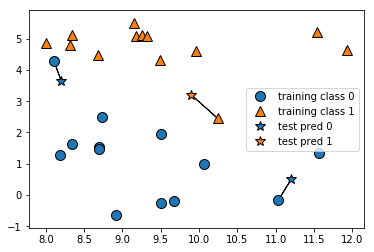

In [28]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

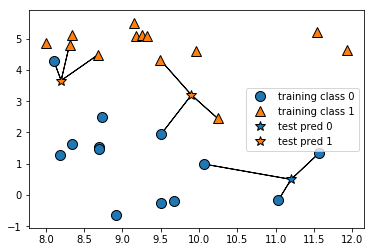

In [29]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [30]:
from sklearn.model_selection import train_test_split
X_forge,y_forge = mglearn.datasets.make_forge()
X_forge_train, X_forge_test, y_forge_train, y_forge_test = train_test_split(X_forge, y_forge, random_state=0)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

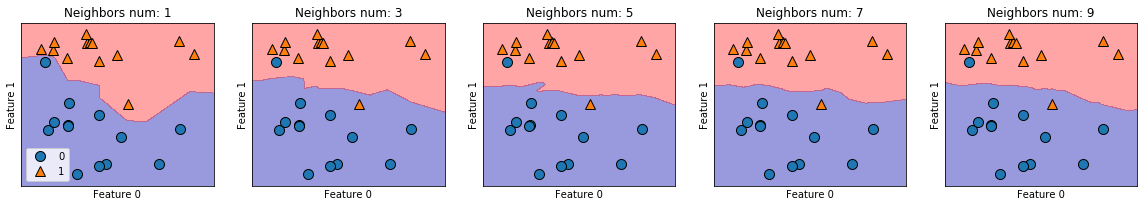

In [32]:
fig, axes = plt.subplots(1,5, figsize=(20,3))
for n_neighbors, ax in zip([1,3,5,7,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_forge,y_forge)
    mglearn.plots.plot_2d_separator(clf, X_forge, fill=True, eps=.5,ax=ax, alpha=.4)
    mglearn.discrete_scatter(X_forge[:,0],X_forge[:, 1], y_forge, ax=ax)
    ax.set_title("Neighbors num: {}".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)

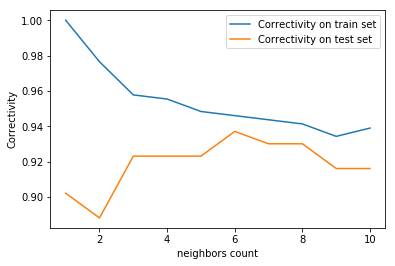

In [33]:
from sklearn.datasets import load_breast_cancer
canser = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(canser.data, canser.target, stratify=canser.target, random_state=66)
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
 # строим модель
    ctf = KNeighborsClassifier(n_neighbors=n_neighbors)
    ctf.fit(X_train, y_train)
 # записываем правильность на обучающем наборе
    training_accuracy.append(ctf.score(X_train, y_train))
 # записываем правильность на тестовом наборе
    test_accuracy.append(ctf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Correctivity on train set")
plt.plot(neighbors_settings, test_accuracy, label="Correctivity on test set")
plt.ylabel("Correctivity")
plt.xlabel("neighbors count")
plt.legend()

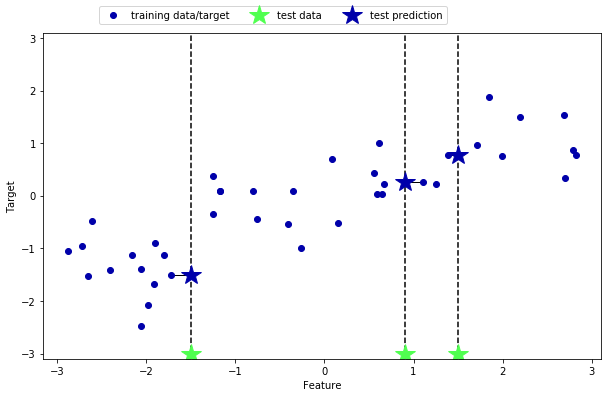

In [34]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

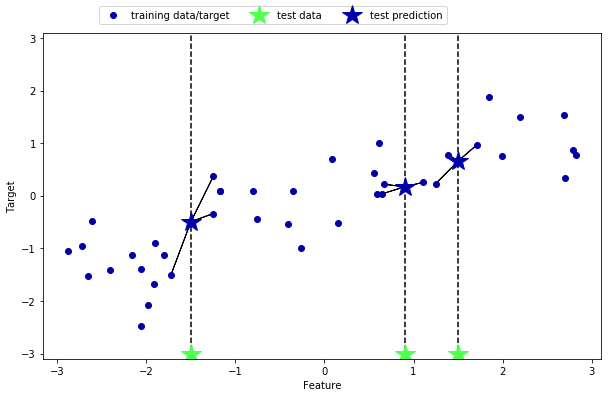

In [35]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [39]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)
# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# создаем экземпляр модели и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors=3)
# подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

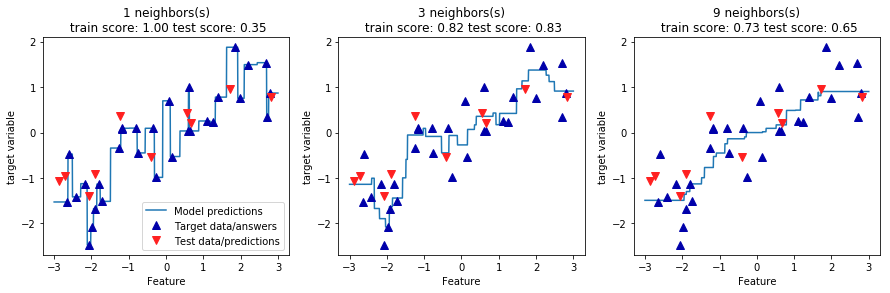

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
     # получаем прогнозы, используя 1, 3, и 9 соседей
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbors(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("target variable")
axes[0].legend(["Model predictions", "Target data/answers", "Test data/predictions"], loc="best")